In [1]:
import ROOT as rt
import root_numpy as rtnp
import numpy as np
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from array import array

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

donotdelete = []

Welcome to JupyROOT 6.13/02


In [2]:
fpath = {}
tree = {}
process = {}
process_short = {}

# fpath['m500ctau1000'] = '/home/cms/Desktop/LLP/jetNtuple_4jet/jetNtuple_M-500_CTau-1000mm.root'
# fpath['m500ctau30'] = '/home/cms/Desktop/LLP/jetNtuple_4jet/jetNtuple_M-500_CTau-30mm.root'
# fpath['QCD300to500'] = '/home/cms/Desktop/LLP/jetNtuple_4jet/jetNtuple_QCD_HT300to500.root'
# fpath['ggh_isr'] = '/home/cms/Desktop/LLP/jetNtuple_RunIISummer16/withISR/jetNtuple_glueball_ggh_withISR_M-50_CTau-1000mm.root'
fpath['vbfh20'] = '/home/cms/Desktop/LLP/jetNtuple_RunIISummer16/withoutISR/jetNtuple_glueball/jetNtuple_glueball_vbfh_M-50_CTau-1000mm_pt20.root'
fpath['vbfh30'] = '/home/cms/Desktop/LLP/jetNtuple_RunIISummer16/withoutISR/jetNtuple_glueball/jetNtuple_glueball_vbfh_M-50_CTau-1000mm_pt30.root'
fpath['vbfh40'] = '/home/cms/Desktop/LLP/jetNtuple_RunIISummer16/withoutISR/jetNtuple_glueball/jetNtuple_glueball_vbfh_M-50_CTau-1000mm_pt40.root'
fpath['qcd'] = '/home/cms/Desktop/LLP/jetNtuple_RunIISummer16/withoutISR/jetNtuple_glueball/jetNtuple_QCD_HT300to500.root'
legend = {'vbfh20':  'vbfh, M = 50 GeV, pt cut 20 GeV',
        'vbfh30':  'vbfh, M = 50 GeV, pt cut 30 GeV',
        'vbfh40':  'vbfh, M = 50 GeV, pt cut 40 GeV',
          'qcd': 'QCD HT 300-500 GeV',
         }
for k,v in fpath.iteritems():
    print k, v
    tree[k] = rtnp.root2array(v)
    #tree[k] = rtnp.tree2array(v)
    #jet_max_pt_array = [np.max(x) for x in tree[k]["jetPt"]]
    a = tree[k]["jetPt"]
    print a[:-1][0]

vbfh40 /home/cms/Desktop/LLP/jetNtuple_RunIISummer16/withoutISR/jetNtuple_glueball/jetNtuple_glueball_vbfh_M-50_CTau-1000mm_pt40.root
[163.69531  86.49124]
vbfh30 /home/cms/Desktop/LLP/jetNtuple_RunIISummer16/withoutISR/jetNtuple_glueball/jetNtuple_glueball_vbfh_M-50_CTau-1000mm_pt30.root
[163.69531  86.49124]
vbfh20 /home/cms/Desktop/LLP/jetNtuple_RunIISummer16/withoutISR/jetNtuple_glueball/jetNtuple_glueball_vbfh_M-50_CTau-1000mm_pt20.root
[163.69531  86.49124]
qcd /home/cms/Desktop/LLP/jetNtuple_RunIISummer16/withoutISR/jetNtuple_glueball/jetNtuple_QCD_HT300to500.root
[104.180176  69.4402    37.214607  33.06379   32.81417 ]


In [ ]:
#get max jet pt per event, also jet[0]
T=tree['vbfh20']
max_jet_pt = np.array([np.max(x) if len(x) else -1 for x in T['jetPt']])
max_jet_ecal_energy = np.array([x[0] if len(x) else -1 for x in T['jet_rechit_E']])
max_jet_ecal_energy1 = np.array([x[0] if len(x) else -1 for x in T['jet_rechit_E_Ecut1']])
max_jet_ecal_energy2 = np.array([x[0] if len(x) else -1 for x in T['jet_rechit_E_Ecut2']])

assert(len(max_jet_ecal_energy) == len(max_jet_pt))
print(len(max_jet_ecal_energy))
print(len(max_jet_pt[max_jet_ecal_energy<50]))
# print max_jet_pt

# Matched Jets and how they change with LLP decay radius

In [4]:
# Create 2d numpy array matched-jets vs. LLP decay radius
match_efficiency_llp_dict = {}
gLLP_decay_radius_dict = {}
gLLP_decay_distance_dict = {}
gLLP_decay_z_dict = {}
matched_jets_perllp_dict = {}
barrel_jets_perllp_dict = {}
loosematched_jets_perllp_dict = {}
hcalmatched_jets_perllp_dict = {}
hcalloosematched_jets_perllp_dict = {}
for k, T in tree.items():
    if not k == 'qcd': # only match the signals
        gLLP_decay_radius = np.sqrt(np.square(T['gLLP_decay_vertex_x']-T['gLLP_prod_vertex_x'])+np.square(T['gLLP_decay_vertex_y']-T['gLLP_prod_vertex_y'])) # (events, 2) 2LLP
        gLLP_decay_z = np.absolute(T['gLLP_decay_vertex_z']-T['gLLP_prod_vertex_z'])
        gLLP_decay_distance = np.sqrt(np.square(T['gLLP_decay_vertex_x']-T['gLLP_prod_vertex_x'])+np.square(T['gLLP_decay_vertex_y']-T['gLLP_prod_vertex_y'])+np.square(T['gLLP_decay_vertex_z']-T['gLLP_prod_vertex_z']))
        gLLP_daughter_pt = T['gLLP_daughter_pt']

        # only care about the first LLP that decays to b-jets
        gLLP_decay_radius = gLLP_decay_radius[:,0]
        gLLP_decay_z = gLLP_decay_z[:,0]
        gLLP_decay_distance = gLLP_decay_distance[:,0]


        gLLP_daughter_match_jet_index = T['gLLP_daughter_match_jet_index']
        gLLP_daughter_match_jet_index_hcal = T['gLLP_daughter_match_jet_index_hcal']
        gLLP_daughter_match_jet_index_loose = T['gLLP_daughter_match_jet_index_loose']
        gLLP_daughter_match_jet_index_hcalloose = T['gLLP_daughter_match_jet_index_hcal_loose']
        gLLP_daughter_travel_time = T['gLLP_daughter_travel_time']
        eventNum = T['eventNum']
        
        # number of matched/barrel jets for each LLP
        # matched_jets.shape = (events,4), matched and hit ECAL barrel
        matched_jets = np.logical_and(np.logical_not( gLLP_daughter_travel_time == -666), np.logical_not( gLLP_daughter_match_jet_index == 666))
        matched_jets_perllp = np.count_nonzero(matched_jets[:,:2],axis=1) # shape = (events,), only care about the b-jets
        loosematched_jets = np.logical_and(np.logical_not( gLLP_daughter_travel_time == -666), np.logical_not( gLLP_daughter_match_jet_index_loose == 666))
        loosematched_jets_perllp = np.count_nonzero(loosematched_jets[:,:2],axis=1)
        hcalmatched_jets = np.logical_and(np.logical_not( gLLP_daughter_travel_time == -666), np.logical_not( gLLP_daughter_match_jet_index_hcal == 666))
        hcalmatched_jets_perllp = np.count_nonzero(hcalmatched_jets[:,:2],axis=1)
        hcalloosematched_jets = np.logical_and(np.logical_not( gLLP_daughter_travel_time == -666), np.logical_not( gLLP_daughter_match_jet_index_hcalloose == 666))
        hcalloosematched_jets_perllp = np.count_nonzero(hcalloosematched_jets[:,:2],axis=1)

        # barrel_jets.shape = (events,2)
        LLP_daughter_barrel = np.logical_not( gLLP_daughter_travel_time == -666) #shape: (events, 4)
        LLP_daughter = np.logical_not(gLLP_daughter_pt == -666)
        LLP_daughter_barrel = LLP_daughter_barrel[:,:2] #only care about the b-jets
        LLP_daughter = LLP_daughter[:,:2]
        barrel_jets_perllp = np.count_nonzero(LLP_daughter_barrel[:,:2],axis=1)

        # now both matched_jets_perllp and barrel_jets_perllp are flattened with shape: (LLP#, )
        # gLLP_decay_radius and match_efficiency also have shape (LLP#,)

        print("Fraction of barrel jets: "+str(1.0*np.count_nonzero(LLP_daughter_barrel)/np.count_nonzero(LLP_daughter)))
        print("Fraction of endcap jets: "+str(1-1.0*np.count_nonzero(LLP_daughter_barrel)/np.count_nonzero(LLP_daughter)))
      
        assert (np.count_nonzero(barrel_jets_perllp==2)+np.count_nonzero(barrel_jets_perllp==1)+np.count_nonzero(barrel_jets_perllp==0)==np.size(barrel_jets_perllp))
        assert(np.count_nonzero(LLP_daughter_barrel)+np.count_nonzero(LLP_daughter_barrel==0)==np.size(LLP_daughter_barrel))



        #2D histograms, get rid of the zeros in the denominator
        hcalloosematched_jets_perllp = hcalloosematched_jets_perllp[barrel_jets_perllp>0]
        loosematched_jets_perllp = loosematched_jets_perllp[barrel_jets_perllp>0]
        hcalmatched_jets_perllp = hcalmatched_jets_perllp[barrel_jets_perllp > 0]
        matched_jets_perllp = matched_jets_perllp[barrel_jets_perllp>0]
        gLLP_decay_radius = gLLP_decay_radius[barrel_jets_perllp > 0] #llp decay radius of llp with at least one barrel
        gLLP_decay_z = gLLP_decay_z[barrel_jets_perllp > 0] #llp decay radius of llp with at least one barrel
        gLLP_decay_distance = gLLP_decay_distance[barrel_jets_perllp > 0] #llp decay radius of llp with at least one barrel
        barrel_jets_perllp = barrel_jets_perllp [barrel_jets_perllp > 0]
        assert(matched_jets_perllp.shape == gLLP_decay_radius.shape == barrel_jets_perllp.shape)
        
        barrel_jets_perllp_dict[k] = barrel_jets_perllp
        matched_jets_perllp_dict[k] = matched_jets_perllp
        hcalmatched_jets_perllp_dict[k] = hcalmatched_jets_perllp
        loosematched_jets_perllp_dict[k] = loosematched_jets_perllp
        hcalloosematched_jets_perllp_dict[k] = hcalloosematched_jets_perllp
        match_efficiency_llp_dict[k] = np.divide(1.0* matched_jets_perllp , barrel_jets_perllp) #match efficiency for each LLP
        gLLP_decay_radius_dict[k] = gLLP_decay_radius
        gLLP_decay_z_dict[k] = gLLP_decay_z
        gLLP_decay_distance_dict[k] = gLLP_decay_distance

        print("inclusive matching efficiency:",1.0*np.sum(matched_jets_perllp)/np.sum(barrel_jets_perllp))
        print("inclusive matching efficiency:",1.0*np.sum(hcalmatched_jets_perllp)/np.sum(barrel_jets_perllp))
        print("inclusive matching efficiency:",1.0*np.sum(loosematched_jets_perllp)/np.sum(barrel_jets_perllp))
        print("inclusive matching efficiency:",1.0*np.sum(hcalloosematched_jets_perllp)/np.sum(barrel_jets_perllp))


Fraction of barrel jets: 0.356572868543
Fraction of endcap jets: 0.643427131457
('inclusive matching efficiency:', 0.9493521790341578)
('inclusive matching efficiency:', 0.9399293286219081)
('inclusive matching efficiency:', 0.9646643109540636)
('inclusive matching efficiency:', 0.9634864546525324)
Fraction of barrel jets: 0.367586611861
Fraction of endcap jets: 0.632413388139
('inclusive matching efficiency:', 0.8570287539936102)
('inclusive matching efficiency:', 0.8410543130990416)
('inclusive matching efficiency:', 0.8761980830670927)
('inclusive matching efficiency:', 0.8722044728434505)
Fraction of barrel jets: 0.381121808288
Fraction of endcap jets: 0.618878191712
('inclusive matching efficiency:', 0.6919275123558485)
('inclusive matching efficiency:', 0.671059857221307)
('inclusive matching efficiency:', 0.7237781438769907)
('inclusive matching efficiency:', 0.7062053816584294)


# Plot matched jet efficiency vs LLP decay radius

Info in <TCanvas::Print>: pdf file ../plots/llp_decay_radius.pdf has been created


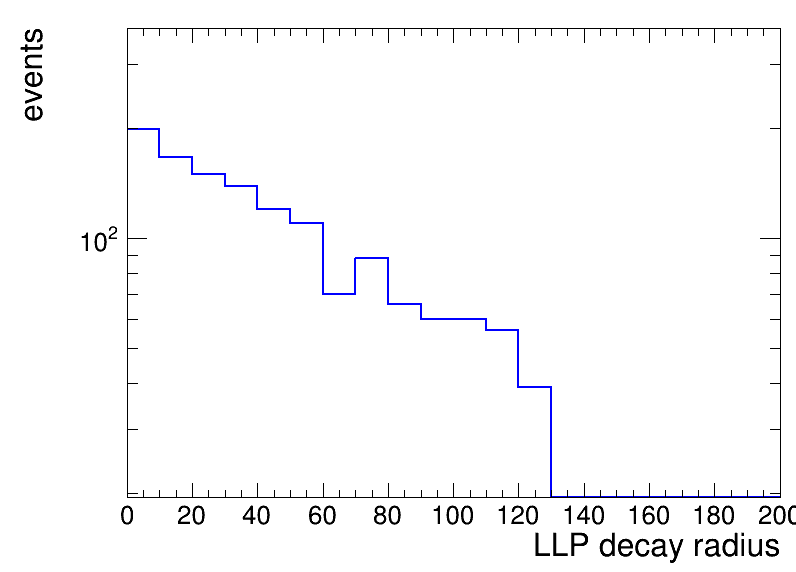

In [5]:
c = rt.TCanvas('c','c', 800, 600)
h = {}
h['llp_decayR'] = create_TH1D(gLLP_decay_radius_dict['vbfh20'], axis_title=['LLP decay radius', 'events'], name='llp_decayR', binning=[20,0,200])
h['llp_decayR'].SetLineColor(4)
c.SetLogy()
h['llp_decayR'].Draw()
c.Draw()
c.SaveAs("../plots/llp_decay_radius.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNorma

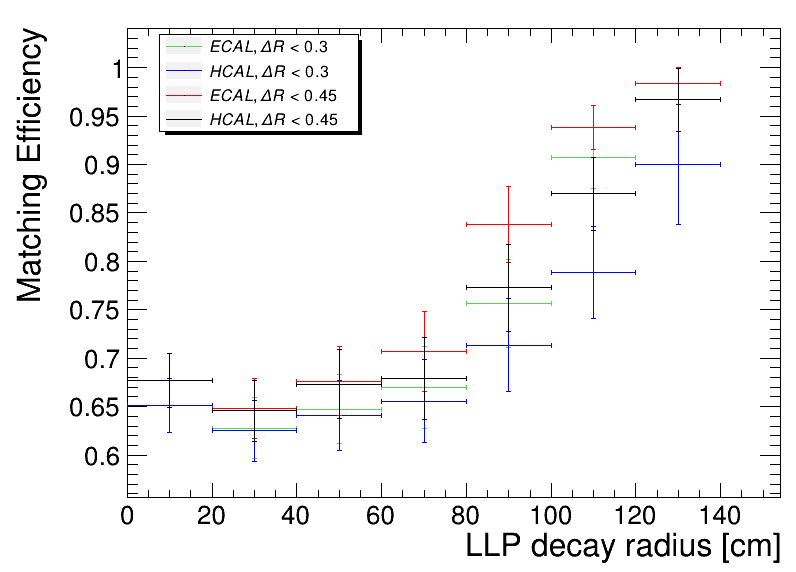

In [33]:
# plot efficiency for a sample, different matching criteria

# Delete objects to prevent memory leak
if hm is not None:
    hm.Delete()
    hb.Delete()
    hmh.Delete()
    hbh.Delete()
    hml.Delete()
    hbl.Delete()
    hmhl.Delete()
    hbhl.Delete()

index = 'vbfh20'
c = rt.TCanvas('c1','c1', 800, 600)
leg = rt.TLegend(0.2,0.77,0.45,0.94)
# leg.SetTextFont(42)
leg.SetTextSize(0.03)
leg.SetEntrySeparation(0.01)
# # Create 2d numpy array matched-jets vs. LLP decay radius
efficiency_plot= []

h = {}
pEff = []
xaxis = gLLP_decay_radius_dict[index]
xaxis_title = 'LLP decay radius [cm]'

hm = create_TH1D(xaxis, 'hm', axis_title = [xaxis_title,'Matching Efficiency'], binning=[100,0,2000],weights = matched_jets_perllp_dict[index])
hb = create_TH1D(xaxis, 'hb', axis_title = [xaxis_title,'Matching Efficiency'], binning=[100,0,2000],weights = barrel_jets_perllp_dict[index])
pEff_ecal = rt.TEfficiency(hm,hb)

hmh = create_TH1D(xaxis, 'hmh', axis_title = [xaxis_title,'Matching Efficiency'], binning=[100,0,2000],weights = hcalmatched_jets_perllp_dict[index])
hbh = create_TH1D(xaxis, 'hbh', axis_title = [xaxis_title,'Matching Efficiency'], binning=[100,0,2000],weights = barrel_jets_perllp_dict[index])
pEff_hcal = rt.TEfficiency(hmh,hbh)

hml = create_TH1D(xaxis, 'hml', axis_title = [xaxis_title,'Matching Efficiency'], binning=[100,0,2000],weights = loosematched_jets_perllp_dict[index])
hbl = create_TH1D(xaxis, 'hbl', axis_title = [xaxis_title,'Matching Efficiency'], binning=[100,0,2000],weights = barrel_jets_perllp_dict[index])
pEff_loose = rt.TEfficiency(hml,hbl)

hmhl = create_TH1D(xaxis, 'hmhl', axis_title = [xaxis_title,'Matching Efficiency'], binning=[100,0,2000],weights = hcalloosematched_jets_perllp_dict[index])
hbhl = create_TH1D(xaxis, 'hbhl', axis_title = [xaxis_title,'Matching Efficiency'], binning=[100,0,2000],weights = barrel_jets_perllp_dict[index])
pEff_hcalloose = rt.TEfficiency(hmhl,hbhl)

leg.AddEntry(pEff_ecal,"ECAL,\\Delta R<0.3")
leg.AddEntry(pEff_hcal,"HCAL,\\Delta R<0.3")
leg.AddEntry(pEff_loose,"ECAL,\\Delta R<0.45")
leg.AddEntry(pEff_hcalloose,"HCAL,\\Delta R<0.45")

# pEff_ecal.SetMarkerStyle(4)
# pEff_loose.SetMarkerStyle(4)
# pEff_hcalloose.SetMarkerStyle(26)
# pEff_hcal.SetMarkerStyle(26)

pEff_hcalloose.SetLineColor(1)
pEff_loose.SetLineColor(2)
pEff_ecal.SetLineColor(8)
pEff_hcal.SetLineColor(4)
pEff_ecal.Draw()
pEff_hcal.Draw('same')
pEff_loose.Draw('same')
pEff_hcalloose.Draw('same')

leg.Draw()
c.Draw()
# pEff_ecal.GetPaintedGraph().GetYaxis().SetRangeUser(0.85,1.1)
# pEff_ecal.GetPaintedGraph().GetXaxis().SetRangeUser(0,300)

c.Update()
c.SaveAs("../plots/efficiency_compare_llpr"+index+".pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficienc

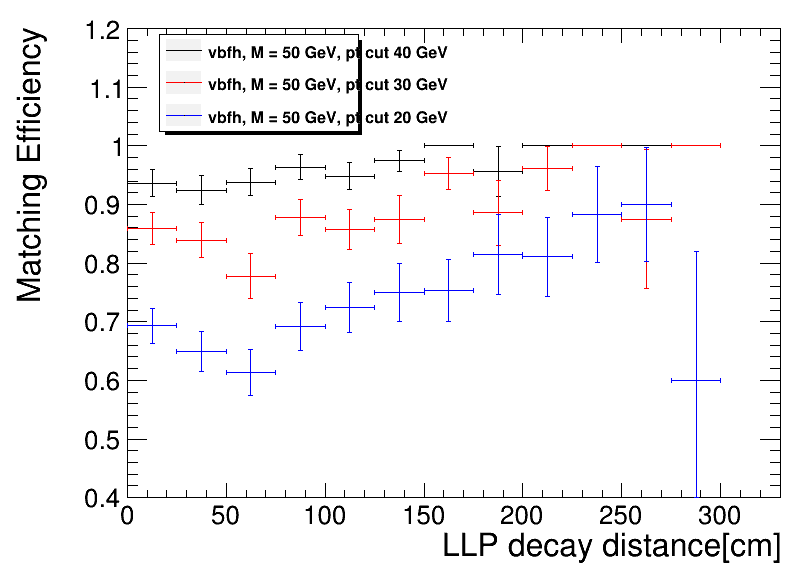

In [42]:
# plot efficiency for multiple samples


c = rt.TCanvas('c1','c1', 800, 600)
leg = rt.TLegend(0.2,0.77,0.45,0.94)
# leg.SetTextFont(42)
leg.SetTextSize(0.03)
leg.SetEntrySeparation(0.01)
# # Create 2d numpy array matched-jets vs. LLP decay radius

pEff = {}
xaxis_title = 'LLP decay distance[cm]'
for k,v in tree.items():
    if not k == 'qcd':
        xaxis = gLLP_decay_distance_dict[k]
        hm = create_TH1D(xaxis, 'hm'+k, axis_title = [xaxis_title,'Matching Efficiency'], binning=[80,0,2000],weights = matched_jets_perllp_dict[k])
        hb = create_TH1D(xaxis, 'hb'+k, axis_title = [xaxis_title,'Matching Efficiency'], binning=[80,0,2000],weights = barrel_jets_perllp_dict[k])
        pEff[k] = rt.TEfficiency(hm,hb)
        leg.AddEntry(pEff[k], legend[k])
i = 0
for k,v in pEff.items():
    pEff[k].SetLineColor(std_color_list[i])
    if i == 0:
        pEff[k].Draw()
        key = k
    pEff[k].Draw('same')
    i += 1

leg.Draw()
c.Draw()
pEff[key].GetPaintedGraph().GetYaxis().SetRangeUser(0.4,1.2)

c.Update()
c.SaveAs("../plots/efficiency_compare_llpdistance_vbfh_ecalmatchtight.pdf")
